## Implementation of Autoencoders
We will create a simple autoencoder with two Dense Layers: an encoder that compresses images into a 64-dimensional latent vector and a decoder that reconstructs the original image from this compressed form.

### Step 1: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist

2025-10-28 12:53:59.775803: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-28 12:53:59.793888: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-28 12:54:00.262311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-28 12:54:04.846825: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

### Step 2: Load the MNIST Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Shape of training and test data is (60000, 28, 28) and (10000, 28, 28)

### Step 3: Define a basic Autoencoder

Creating a simple autoencoder class with an encoder and decoder using Keras Sequential model.
* layers.Input(shape=(28, 28, 1)): Input layer expecting grayscale images of size 28x28.
* layers.Dense(latent_dimensions, activation = 'relu'): Dense layer that compresses the input to the latent space using ReLU activation.
* layers.Dense(28*28, activation='sigmoid'): Dense layer that expands the latent vector back to the original image size with sigmoid activation.

In [4]:
class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(28*28, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])
    
    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

### Step 4: Compiling and Fitting Autoencoder

Here we compile using Adam optimizer and Mean Squared Error loss also we train for 10 epochs with batch size 256.

* latent_dimensions = 64: Sets the size of the compressed latent space to 64.

In [5]:
latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True,
                validation_data = (x_test, x_test))

2025-10-28 13:23:11.435419: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0590 - val_loss: 0.0302
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0247 - val_loss: 0.0197
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0173 - val_loss: 0.0145
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0131 - val_loss: 0.0112
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0084 - val_loss: 0.0075
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0053 - val_loss: 0.0049


### Step 5: Visualize original and reconstructed data
Now compare original images and their reconstructions from autoencoder.


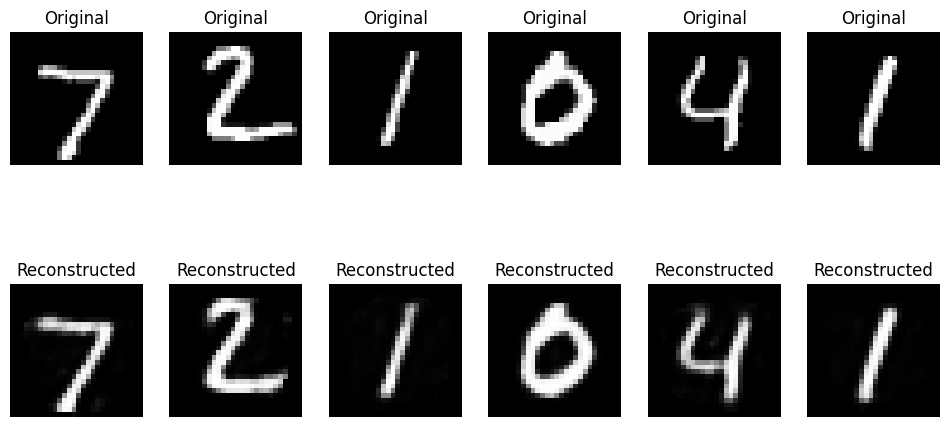

In [10]:
encoded_imgs = autoencoder.encoder(x_test)
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 6
plt.figure(figsize=(12,6))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()

The visualization compares original MNIST images (top row) with their reconstructed versions (bottom row) showing that the autoencoder effectively captures key features despite some minor bluriness.

#### Limitations
Autoencoders are useful but also have some limitations:
* Memorizing Instead of Learning Patterns
* Reconstructed Data Might Not Be Prefect
* Requires a Large Dataset and Good Parameter Tuning